## Classification d'images de vêtements¶


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import to_categorical

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


## Importer le fichier de données Fashion MNIST¶


In [2]:
## Les classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

nb_classes = len(class_names)

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

l__, imRows, imCols = test_images.shape

In [4]:
X_train = train_images.reshape(train_images.shape[0], imRows, imCols, 1)
X_test = test_images.reshape(test_images.shape[0], imRows, imCols, 1)
input_shape = (imRows, imCols, 1)
X_train = X_train / 255.0
X_test = X_test / 255.0
Y_train = keras.utils.to_categorical(train_labels, nb_classes)
Y_test = keras.utils.to_categorical(test_labels, nb_classes)

## Exploration des données¶
    On peut vérifier le format des données chargées. Tout d'abord le tableau des 60000 images d'apprentissage de 28 x 28 pixels:

In [5]:
X_train.shape

(60000, 28, 28, 1)



De même, il y a 60000 labels dans l'ensemble d'apprentissage:


In [6]:
len(Y_train)

60000

Chaque label est un entier entre 0 et 9:

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Il y a 10000 images dans l'ensemble test avec des images de 28 x 28 pixels:

In [8]:
X_test.shape

(10000, 28, 28, 1)

In [9]:
len(Y_test)

10000

## Prétraitement des données¶
    Les données doivent être retraitées/transformées avant apprentissage. En effet chaque pixel a une valeur entre 0 et 255:

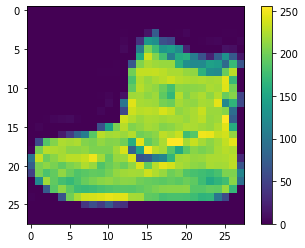

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()



Il nous faut des valeurs d'entrée (flottants) entre 0 et 1 pour le réseau de neurones. Voici comment répondre à cette contrainte:




Pour vérifier que le format des données est correct, on va visualiser quelques exemples (les 25 premières images) accompagnées de leur classe respective:


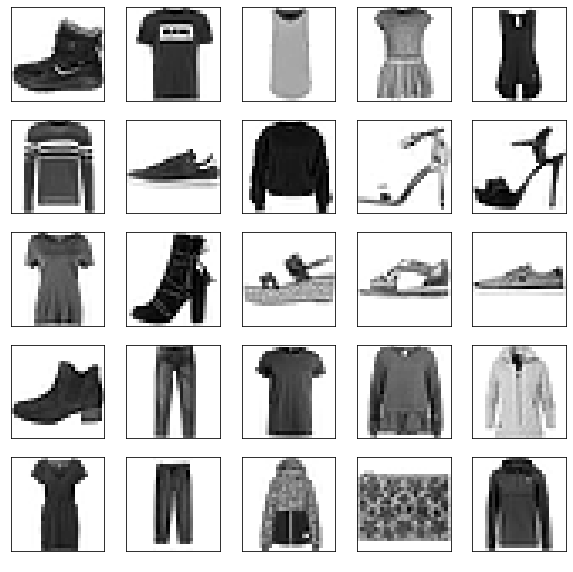

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color="white")
plt.show()

## Construction du modèle

    Construire le réseau de neurones se passe en deux temps: définir les différentes couches du réseau, puis compiler le modèle.

### Configuration des couches du réseau

    Le "deep learning" consiste en général à chainer plusieurs couches de neurones simples. La plupart des couches, telle que tf.keras.layers.Dense, ont des paramètres qui seront appris à l'exécution.


In [12]:
model = keras.Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Alimenter le modèle¶

In [21]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 43s 22ms/step - loss: 0.6857 - accuracy: 0.7454
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3209 - accuracy: 0.8843
Epoch 3/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.2664 - accuracy: 0.9017
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2386 - accuracy: 0.9109
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2213 - accuracy: 0.9199
Epoch 6/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.2070 - accuracy: 0.9263
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1943 - accuracy: 0.9296
Epoch 8/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1961 - accuracy: 0.9310
Epoch 9/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1814 - accuracy: 0.9351
Epoch 10/10
1875/1875 [==============================] - 40s 21m


### Evaluer la performance

    On évalue la performance sur l'ensemble de test:


In [22]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3668 - accuracy: 0.9051

Test accuracy: 0.9050999879837036



### Faire de la prédiction

    Une fois le modèle appris, on peut réaliser de la prédiction sur un ensemble d'images.


In [23]:
predictions = model.predict(X_test)

In [24]:
predictions[0]

array([7.4086496e-21, 2.0359539e-22, 9.2481781e-22, 7.6353991e-22,
       1.4424248e-22, 1.0061981e-09, 2.6295117e-20, 3.4811869e-08,
       2.2591973e-16, 1.0000000e+00], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

Sur les exemples de test on peut vérifier le résultat:

In [26]:
test_labels[0]

9



On se propose à présent de tracer les résultats de prédictions avec les fonctions ci-dessous:


In [27]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


### Vérifier les prédictions

    Les prédictions correctes sont en bleu, les mauvaises en gris. Le nombre donne la probabilité du résultat exprimée en pourcentage.


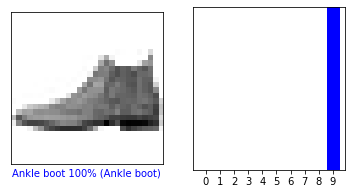

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

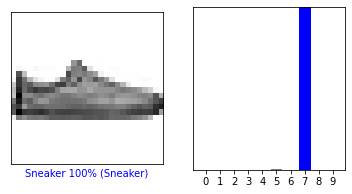

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()



On peut visualiser plusieurs images avec leur prédiction ci-dessous.


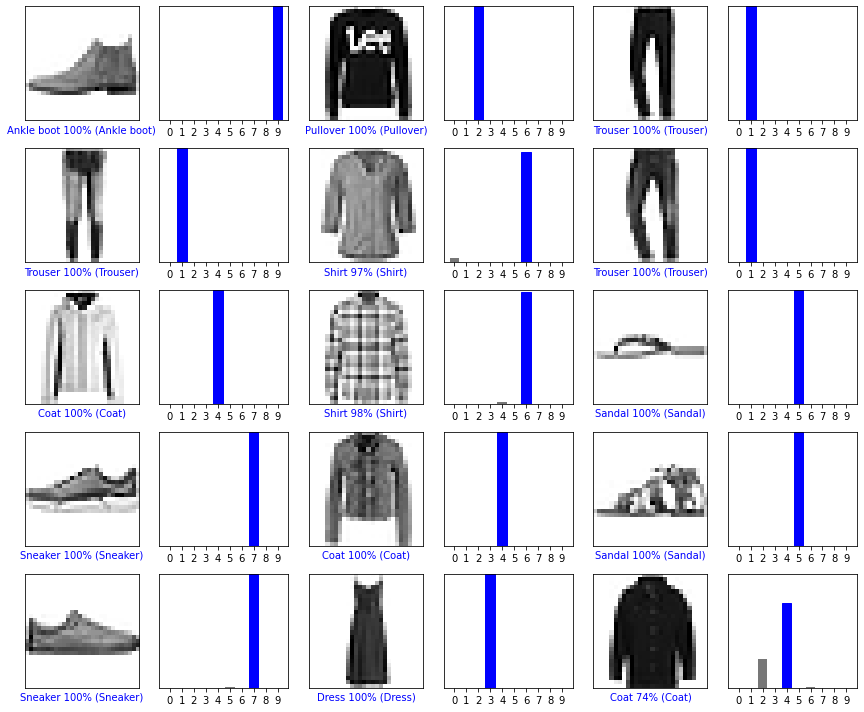

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


### Utilisation du modèle appris

Voici comment proc"der lorsqu'on teste une seule image à la fois.


In [31]:
# Grab an image from the test dataset.
img = X_test[1]

print(img.shape)

(28, 28, 1)




tf.keras est prévu pour traiter des batchs d'exemples ou des collections, c'est pourquoi il est nécessaire de placer une image simple à classer dans une liste:


In [32]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)




A présent, on peut prédire le label de l'image:


In [33]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.1342392e-08 2.4651701e-19 9.9999928e-01 5.6941122e-11 6.5369676e-07
  9.3100468e-14 1.4518498e-07 2.2161231e-17 6.4857638e-14 8.8514157e-19]]


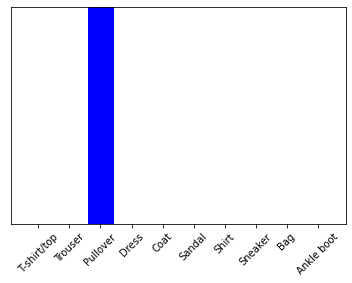

In [34]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)



model.predict renvoie une liste de tableaux de valeurs. Récupération de l'indice de la classe:


In [35]:
np.argmax(predictions_single[0])

2